IMPORTING REQUIRED LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import joblib
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
modell= LogisticRegression()

from sklearn.metrics import confusion_matrix

from sklearn import tree
modeld=tree.DecisionTreeClassifier()

from sklearn.svm import SVC
models=SVC()

from sklearn.ensemble import RandomForestClassifier
modelr=RandomForestClassifier()

from sklearn.model_selection import cross_val_score

from sklearn.cluster import KMeans

from sklearn.preprocessing import MinMaxScaler

from sklearn.naive_bayes import GaussianNB
modelg=GaussianNB()

from sklearn.naive_bayes import MultinomialNB
modelm=MultinomialNB()

from sklearn.pipeline import Pipeline

from sklearn.feature_extraction.text import CountVectorizer
v=CountVectorizer()

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import RandomizedSearchCV

In [2]:
df=pd.read_csv("C:\\Users\\manso\\OneDrive\\Desktop\\datasets\\airline_passenger_satisfaction.csv")
pd.set_option('display.max_columns', None)
df.head(10)

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,3,4,3,3,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,2,3,5,2,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,4,4,5,4,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,2,3,4,2,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,3,3,5,3,3,4,4,5,4,3,3,3,3,Satisfied
5,6,Male,43,Returning,Business,Business,3788,0,0.0,4,4,3,5,4,4,4,4,3,3,4,4,4,4,Satisfied
6,7,Male,43,Returning,Business,Business,1963,0,0.0,3,3,4,4,3,5,5,5,4,5,5,3,5,5,Satisfied
7,8,Female,60,Returning,Business,Business,853,0,3.0,3,4,3,4,4,3,4,4,4,4,3,4,3,3,Satisfied
8,9,Male,50,Returning,Business,Business,2607,0,0.0,1,1,3,2,1,4,3,4,3,3,4,4,4,4,Neutral or Dissatisfied
9,10,Female,38,Returning,Business,Business,2822,13,0.0,2,5,3,5,2,5,4,5,4,2,5,2,5,5,Satisfied


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

In [4]:
df.isnull().sum()

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

AS THE MISSING DATA IS VERY LESS WE CAN DROP THOS ROWS 

In [5]:
df.dropna(inplace=True)

In [6]:
df.describe()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000
mean,64958.335169,39.428761,1190.210662,14.643385,15.091129,3.057349,2.756786,3.306239,3.252720,2.976909,3.383204,3.441589,3.351078,3.286222,3.204685,3.642373,2.728544,3.358067,3.631886
std,37489.781165,15.117597,997.560954,37.932867,38.465650,1.526787,1.401662,1.266146,1.350651,1.278506,1.287032,1.319168,1.316132,1.313624,1.329905,1.176614,1.329235,1.334149,1.180082
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32494.500000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,64972.000000,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,97415.500000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,129880.000000,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [7]:
df.columns

Index(['ID', 'Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')

Visualisation  Of  Categorical Data

Gender
AxesSubplot(0.125,0.125;0.775x0.755)


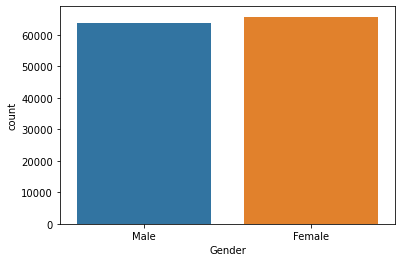

Customer Type
AxesSubplot(0.125,0.125;0.775x0.755)


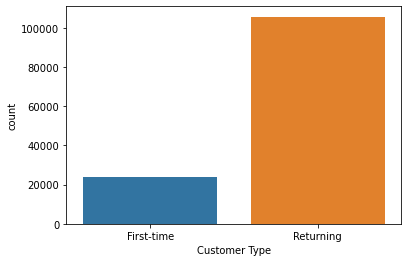

Type of Travel
AxesSubplot(0.125,0.125;0.775x0.755)


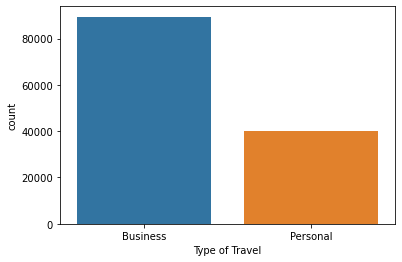

Class
AxesSubplot(0.125,0.125;0.775x0.755)


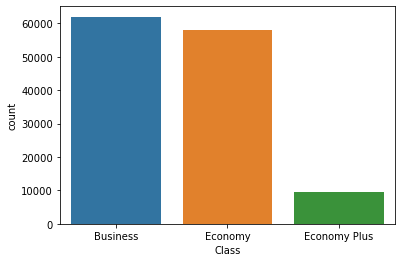

Satisfaction
AxesSubplot(0.125,0.125;0.775x0.755)


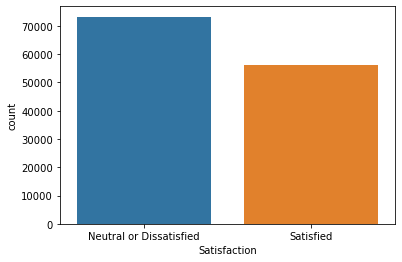

In [8]:
cols=['Gender','Customer Type', 'Type of Travel', 'Class','Satisfaction' ]
for col in cols:
    print(col)
    print(sns.countplot(x=col, data =df))
    plt.show()

<AxesSubplot:xlabel='Customer Type', ylabel='count'>

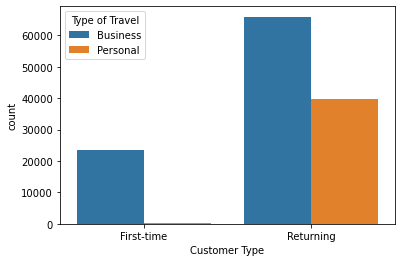

In [9]:
sns.countplot(x='Customer Type', hue='Type of Travel', data= df)

<AxesSubplot:xlabel='Customer Type', ylabel='count'>

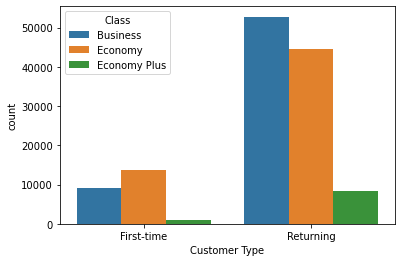

In [10]:
sns.countplot(x='Customer Type', hue='Class', data= df)

<AxesSubplot:xlabel='Class', ylabel='count'>

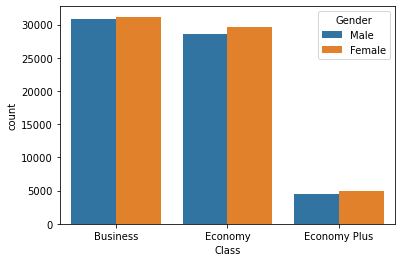

In [11]:
sns.countplot(x='Class', hue='Gender', data= df)

 HANDLING CATGORICAL DATA

In [12]:
df.columns

Index(['ID', 'Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')

In [13]:
d2=pd.get_dummies(df[['Gender','Customer Type', 'Type of Travel', 'Class','Satisfaction'] ],drop_first=True)

In [41]:
d2.head()

,Gender_Male,Customer Type_Returning,Type of Travel_Personal,Class_Economy,Class_Economy Plus,Satisfaction_Satisfied
0,1,0,0,0,0,0
1,0,1,0,0,0,1
2,1,1,0,0,0,1
3,1,1,0,0,0,1
4,0,1,0,0,0,1


In [15]:
merged=pd.concat([df,d2], axis=1)

In [40]:
merged.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Gender_Male,Customer Type_Returning,Type of Travel_Personal,Class_Economy,Class_Economy Plus,Satisfaction_Satisfied
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,3,4,3,3,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied,1,0,0,0,0,0
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,2,3,5,2,5,4,5,5,3,5,2,5,5,Satisfied,0,1,0,0,0,1
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,4,4,5,4,3,5,3,5,5,3,4,3,3,Satisfied,1,1,0,0,0,1
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,2,3,4,2,5,5,5,4,4,5,2,5,5,Satisfied,1,1,0,0,0,1
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,3,3,5,3,3,4,4,5,4,3,3,3,3,Satisfied,0,1,0,0,0,1


In [17]:
final=merged.drop(['Gender','Customer Type', 'Type of Travel', 'Class','Satisfaction'], axis=1)
final.head()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Gender_Male,Customer Type_Returning,Type of Travel_Personal,Class_Economy,Class_Economy Plus,Satisfaction_Satisfied
0,1,48,821,2,5.0,3,3,4,3,3,3,5,2,5,5,5,3,5,5,1,0,0,0,0,0
1,2,35,821,26,39.0,2,2,3,5,2,5,4,5,5,3,5,2,5,5,0,1,0,0,0,1
2,3,41,853,0,0.0,4,4,4,5,4,3,5,3,5,5,3,4,3,3,1,1,0,0,0,1
3,4,50,1905,0,0.0,2,2,3,4,2,5,5,5,4,4,5,2,5,5,1,1,0,0,0,1
4,5,49,3470,0,1.0,3,3,3,5,3,3,4,4,5,4,3,3,3,3,0,1,0,0,0,1


In [18]:
x=final.drop(['Satisfaction_Satisfied'], axis=1)
x.head()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Gender_Male,Customer Type_Returning,Type of Travel_Personal,Class_Economy,Class_Economy Plus
0,1,48,821,2,5.0,3,3,4,3,3,3,5,2,5,5,5,3,5,5,1,0,0,0,0
1,2,35,821,26,39.0,2,2,3,5,2,5,4,5,5,3,5,2,5,5,0,1,0,0,0
2,3,41,853,0,0.0,4,4,4,5,4,3,5,3,5,5,3,4,3,3,1,1,0,0,0
3,4,50,1905,0,0.0,2,2,3,4,2,5,5,5,4,4,5,2,5,5,1,1,0,0,0
4,5,49,3470,0,1.0,3,3,3,5,3,3,4,4,5,4,3,3,3,3,0,1,0,0,0


In [19]:
y=final.Satisfaction_Satisfied
y.head()

0    0
1    1
2    1
3    1
4    1
Name: Satisfaction_Satisfied, dtype: uint8

SPLITTING THE DATA INTO TRAIN AND TEST DATA 

In [20]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2)

TESTING VARIOUS MODELS 

In [21]:
modeld.fit(x_train,y_train)

DecisionTreeClassifier()

In [22]:
modeld.score(x_test,y_test)

0.9454398023013361

In [23]:
modelr.fit(x_train,y_train)

RandomForestClassifier()

In [24]:
modelr.score(x_test,y_test)

0.9639740520503514

In [27]:
modell.fit(x_train,y_train)

C:\Users\manso\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
cross_val_score(modell, x, y,cv=3)

C:\Users\manso\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\manso\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

array([0.49021152, 0.63240814, 0.63609193])

In [25]:
cross_val_score(modeld, x, y,cv=3)

array([0.78066863, 0.89829016, 0.89342477])

In [26]:
cross_val_score(modelr, x, y,cv=3)

array([0.94370178, 0.96072935, 0.96758723])

In [32]:
model_random=RandomForestClassifier(n_estimators=200)
model_random.fit(x_train,y_train)

RandomForestClassifier(n_estimators=200)

In [33]:
model_random.score(x_test,y_test)

0.9652868947409067

AS PER THE RESULTS RANDOM FOREST GIVES MAXIMUM SCORE 

SAVING THE MODEL TO A FILE

In [34]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(modelr, open(filename, 'wb'))

SAVING THE CLEAN DATA 

In [37]:
df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,3,4,3,3,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,2,3,5,2,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,4,4,5,4,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,2,3,4,2,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,3,3,5,3,3,4,4,5,4,3,3,3,3,Satisfied


In [38]:
df.to_csv('airline_passenger_satisfaction_clean', index=False)